In [137]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df_train = pd.read_csv('Downloads/train.csv')
df_test = pd.read_csv('Downloads/test.csv')
df_sample = pd.read_csv('Downloads/sample_submission.csv')

In [139]:
df_train.head(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [140]:
df_train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


In [141]:
df_train.set_index('id', inplace=True)

count    300000.000000
mean          7.456260
std           0.887295
min           0.000000
25%           6.798341
50%           7.496503
75%           8.161166
max          10.309208
Name: target, dtype: float64


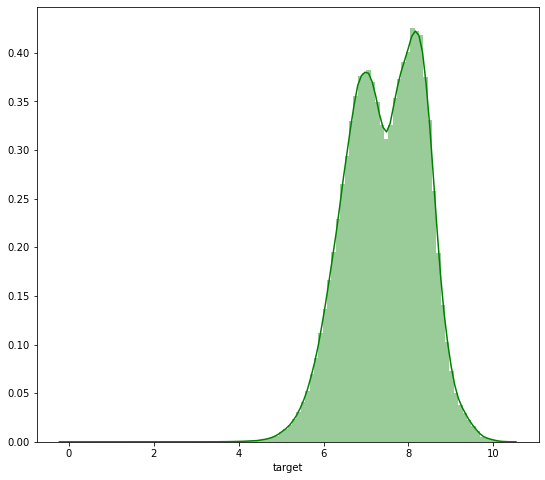

In [142]:
print(df_train['target'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['target'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [143]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [144]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


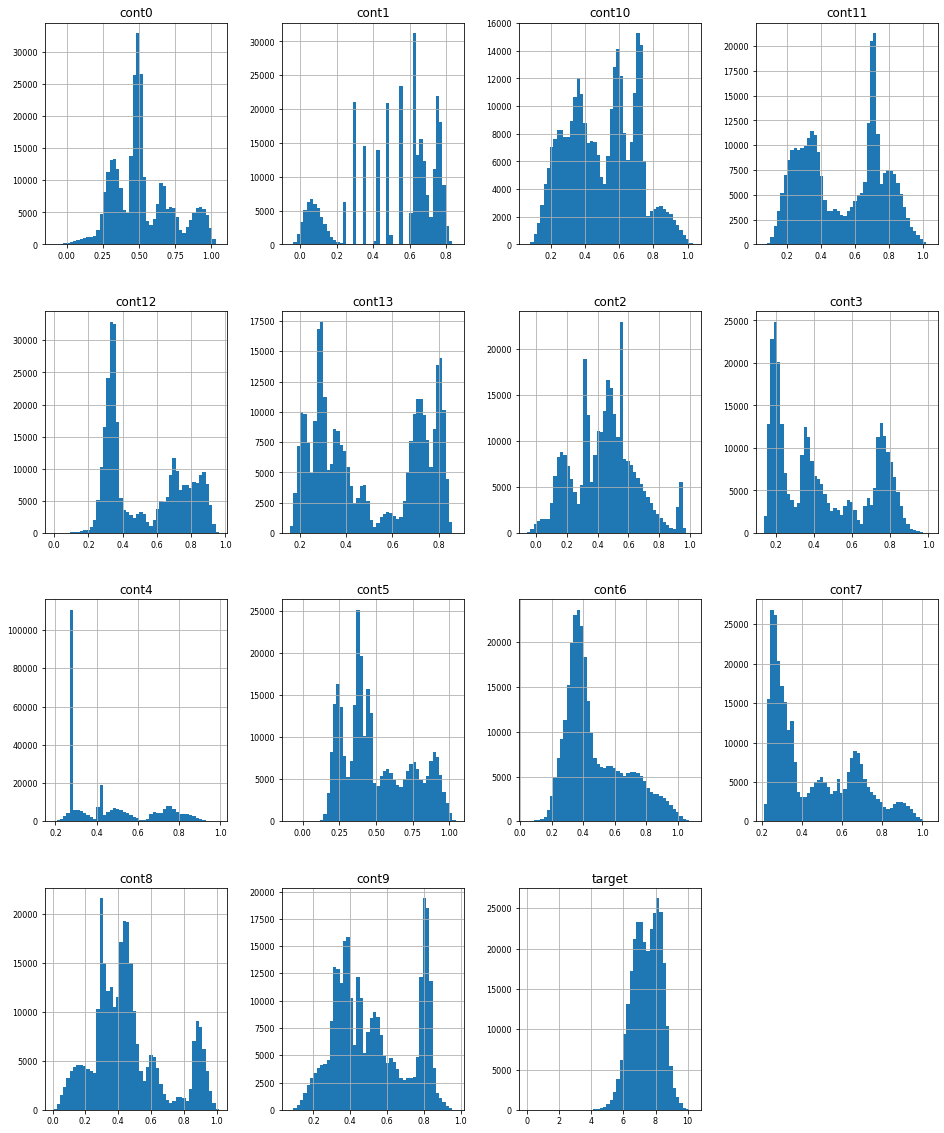

In [145]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [146]:
df_num_corr = df_num.corr()['target'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with target:
Series([], Name: target, dtype: float64)


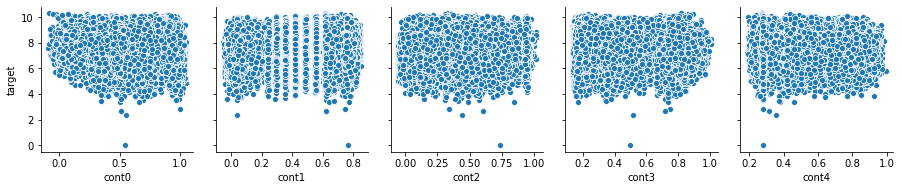

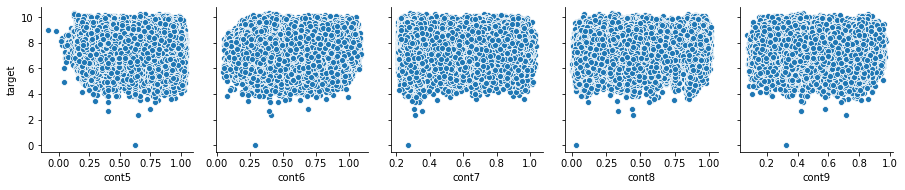

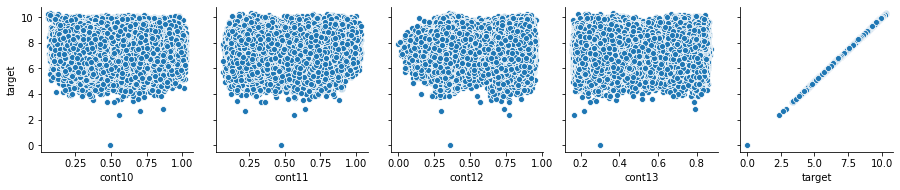

In [147]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['target'])

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [149]:
from sklearn.preprocessing import OrdinalEncoder
ordi = OrdinalEncoder()

df_train.cat0 = ordi.fit_transform(df_train.cat0.values.reshape(-1,1))
df_train.cat1 = ordi.fit_transform(df_train.cat1.values.reshape(-1,1))
df_train.cat2 = ordi.fit_transform(df_train.cat2.values.reshape(-1,1))
df_train.cat3 = ordi.fit_transform(df_train.cat3.values.reshape(-1,1))
df_train.cat4 = ordi.fit_transform(df_train.cat4.values.reshape(-1,1))
df_train.cat5 = ordi.fit_transform(df_train.cat5.values.reshape(-1,1))
df_train.cat6 = ordi.fit_transform(df_train.cat6.values.reshape(-1,1))
df_train.cat7 = ordi.fit_transform(df_train.cat7.values.reshape(-1,1))
df_train.cat8 = ordi.fit_transform(df_train.cat8.values.reshape(-1,1))
df_train.cat9 = ordi.fit_transform(df_train.cat9.values.reshape(-1,1))

In [150]:
#Feature Scaling

In [151]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [152]:
#Split the dataset into the training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [153]:
df_train.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 10:] = sc.fit_transform(X_train[:, 10:])
X_test[:, 10:] = sc.fit_transform(X_test[:, 10:])

In [155]:
X_train

array([[ 0.  ,  1.  ,  0.  , ..., -0.99,  0.72,  1.48],
       [ 0.  ,  1.  ,  0.  , ..., -0.32, -0.96, -1.28],
       [ 0.  ,  1.  ,  0.  , ..., -0.32,  1.27, -0.85],
       ...,
       [ 0.  ,  1.  ,  0.  , ..., -1.03, -1.09, -1.37],
       [ 0.  ,  1.  ,  0.  , ..., -0.82,  0.92, -0.04],
       [ 0.  ,  1.  ,  0.  , ...,  0.84, -0.79, -0.46]])

In [156]:
#Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [157]:
#Predict test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[7.41 8.55]
 [7.51 7.97]
 [7.73 8.17]
 ...
 [7.64 7.7 ]
 [7.46 7.65]
 [7.47 7.79]]


In [158]:
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,8.547085,7.411800
1,7.970948,7.514780
2,8.168811,7.727004
3,7.307704,7.435611
4,8.251527,7.540443
...,...,...
59995,7.175901,7.565841
59996,7.476264,7.374411
59997,7.704885,7.635036
59998,7.653630,7.455693


In [159]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.8683013902450221

In [160]:
df_test.set_index('id', inplace=True)

In [161]:
finals = regressor.predict(df_test)

ValueError: could not convert string to float: 'A'

In [77]:
df_test.reset_index(drop=False, inplace = True)

In [78]:
df_test.head(2)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,0.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,4.0,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,0.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251


In [79]:
finals
finals[finals <0] = 0


In [80]:
final_result = pd.DataFrame({'id': df_test.id, 'target': finals})
final_result.to_csv('my_submission.csv', index = False)